In [11]:
# csv_file = "/home/tlips/Code/few-shot-keypoints/results/SPAIR-support-sets/SPAIR-support-sets.csv"
csv_file = "/home/tlips/Code/few-shot-keypoints/results/SPAIR-correspondences/SPAIR-correspondences.csv"
import pandas as pd

df = pd.read_csv(csv_file)

df.head()


# drop results_json_path column and test_dataset_path
df = df.drop(columns=["results_json_path", "test_dataset_path"])
df["image_PCK"] = df["image_PCK"] * 100

df.head()





,featurizer,category,N_support_images,image_PCK,image_PCK_visible_only,mAP_bbox_alpha,median_keypoint_distance,average_keypoint_distance
0,radiov2-h,dog,1,65.874575,0.658746,0.634085,14.660581,31.921087
1,radiov2-h,dog,1,58.901615,0.589016,0.573217,21.456181,40.067728
2,radiov2-h,dog,1,66.915160,0.669152,0.633587,14.991639,32.437360
3,radiov2-h,dog,1,61.054509,0.610545,0.602406,17.871156,35.760207
4,radiov2-h,dog,1,59.246465,0.592465,0.615201,17.554631,34.655069


In [12]:
local_df = df[df["N_support_images"] == 1]
local_df = local_df[local_df["category"] == "car"]
local_df

,featurizer,category,N_support_images,image_PCK,image_PCK_visible_only,mAP_bbox_alpha,median_keypoint_distance,average_keypoint_distance
65,radiov2-h,car,1,59.573237,0.595732,0.412872,22.637759,67.924609
66,radiov2-h,car,1,63.381428,0.633814,0.442845,19.410679,60.758466
67,radiov2-h,car,1,64.513165,0.645132,0.481186,19.015414,55.716070
68,radiov2-h,car,1,61.029593,0.610296,0.480121,20.077477,62.629755
69,radiov2-h,car,1,62.906054,0.629061,0.502954,19.670783,61.073766
155,dinov2-s,car,1,53.079078,0.530791,0.489716,33.066220,83.733724
156,dinov2-s,car,1,56.182504,0.561825,0.544201,27.419615,75.434497
157,dinov2-s,car,1,58.154371,0.581544,0.537801,24.428333,74.895038
158,dinov2-s,car,1,59.066175,0.590662,0.512491,24.459867,73.151049
159,dinov2-s,car,1,51.313732,0.513137,0.496884,32.335112,88.254723


,image_PCK,image_PCK_visible_only,mAP_bbox_alpha,median_keypoint_distance,average_keypoint_distance
N_support_images,,,,,
1,53.505684,0.535057,0.534315,30.216432,62.77514


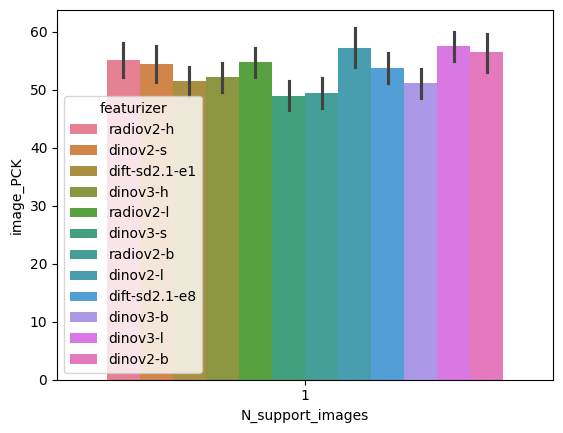

In [13]:
# barplot for different values of N_support images averaged across all featureizers and categories

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# add error bars
sns.barplot(x="N_support_images", y="image_PCK", hue="featurizer", data=df)

# print corresponding df 

this_df = df.groupby(["N_support_images"]).mean(numeric_only=True)
this_df









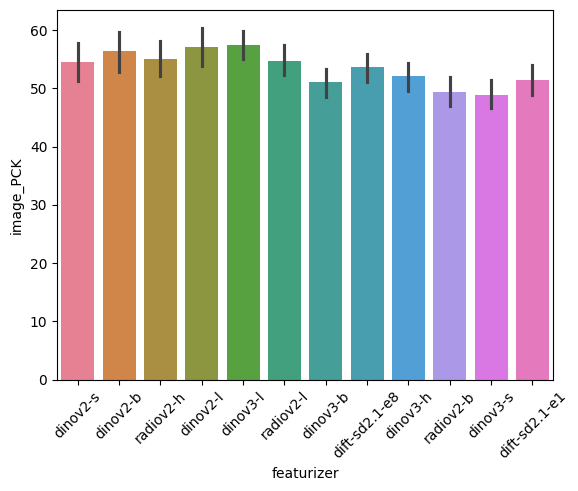

: 

In [ ]:
# now split across featurizers  
# order by the imge_PCK
sns.barplot(x="featurizer", y="image_PCK", hue="featurizer", data=df)
# set labels at 45 degrees
plt.xticks(rotation=45)

plt.show()

In [24]:
# print the DF for each featurizer aggregated across all categories and N_support_images

local_df = df.groupby(["featurizer"]).mean(numeric_only=True).sort_values(by="image_PCK", ascending=False)
print(local_df)

               N_support_images  image_PCK  image_PCK_visible_only  \
featurizer                                                           
dinov3-l                    1.0  57.488937                0.574889   
dinov2-l                    1.0  57.153795                0.571538   
dinov2-b                    1.0  56.387313                0.563873   
radiov2-h                   1.0  55.085525                0.550855   
radiov2-l                   1.0  54.780967                0.547810   
dinov2-s                    1.0  54.461289                0.544613   
dift-sd2.1-e8               1.0  53.705233                0.537052   
dinov3-h                    1.0  52.124963                0.521250   
dift-sd2.1-e1               1.0  51.393865                0.513939   
dinov3-b                    1.0  51.088354                0.510884   
radiov2-b                   1.0  49.447848                0.494478   
dinov3-s                    1.0  48.950114                0.489501   

               mAP_

Text(0.5, 1.0, 'PCK on SPAIR-71k in 1-shot setting with random 50/50 splits for each category')

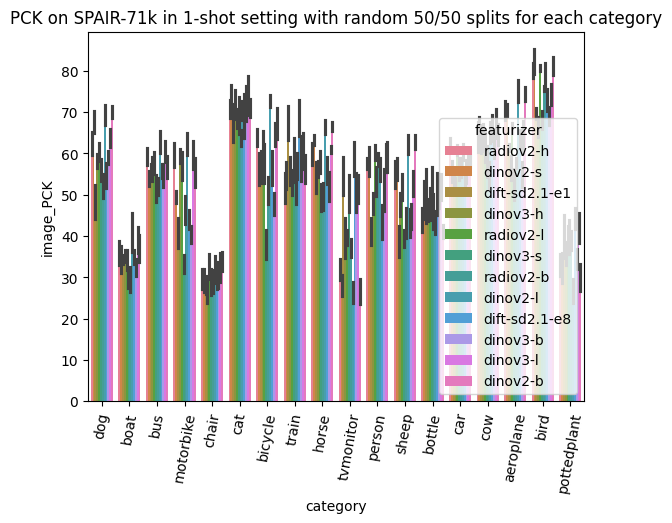

In [15]:
# only take those with N=1
local_df = df[df["N_support_images"] == 1]
sns.barplot(x="category", y="image_PCK", hue="featurizer", data=local_df)
# vertical xlabels
plt.xticks(rotation=80)
plt.title("PCK on SPAIR-71k in 1-shot setting with random 50/50 splits for each category")


,N_support_images,image_PCK,image_PCK_visible_only,mAP_bbox_alpha,median_keypoint_distance,average_keypoint_distance
featurizer,,,,,,
dift-sd2.1-e1,1.0,51.393865,0.513939,0.570122,33.560831,73.189140
dift-sd2.1-e8,1.0,53.705233,0.537052,0.591643,30.491218,70.200853
dinov2-b,1.0,56.387313,0.563873,0.528381,28.420811,55.817509
dinov2-l,1.0,57.153795,0.571538,0.531343,28.314332,55.516977
dinov2-s,1.0,54.461289,0.544613,0.526367,29.917946,58.118959
dinov3-b,1.0,51.088354,0.510884,0.548794,31.646607,72.725808
dinov3-h,1.0,52.124963,0.521250,0.530549,31.264364,68.121665
dinov3-l,1.0,57.488937,0.574889,0.555954,24.305944,57.917881
dinov3-s,1.0,48.950114,0.489501,0.520590,35.046764,70.325920


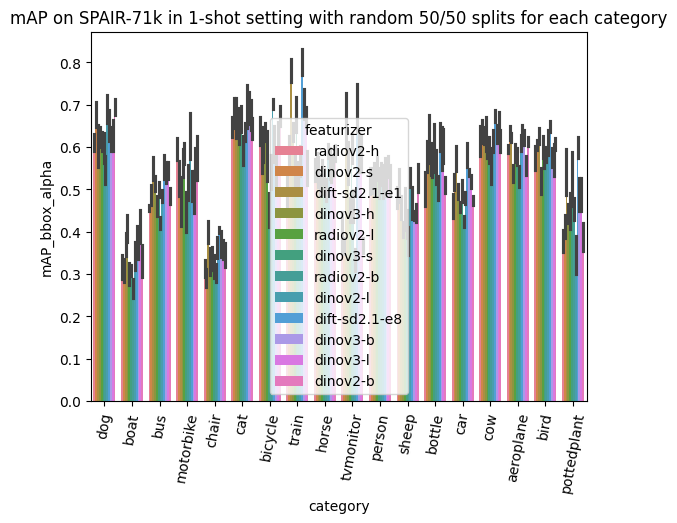

In [16]:
# only take those with N=1
local_df = df[df["N_support_images"] == 1]
sns.barplot(x="category", y="mAP_bbox_alpha", hue="featurizer", data=local_df)
# vertical xlabels
plt.xticks(rotation=80)
plt.title("mAP on SPAIR-71k in 1-shot setting with random 50/50 splits for each category")

# average map for both featurizers
local_df.groupby("featurizer").mean(numeric_only=True)


,image_PCK,image_PCK_visible_only,mAP_bbox_alpha,median_keypoint_distance,average_keypoint_distance
N_support_images,,,,,
1,63.856188,0.638562,0.593881,21.448555,61.104691


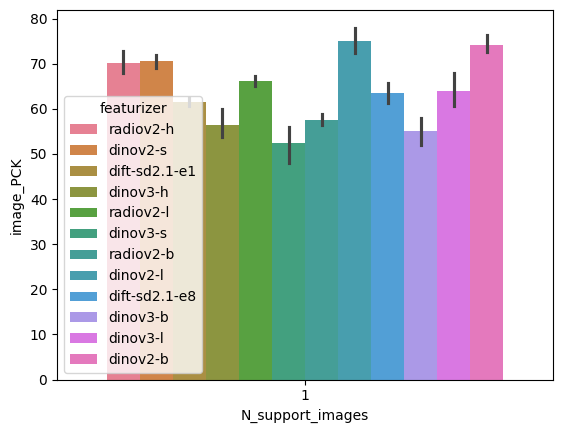

In [17]:
# barplot for different values of N_support images averaged across all featureizers and categories

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


local_df = df[df["category"] == "aeroplane"]
# add error bars
sns.barplot(x="N_support_images", y="image_PCK", hue="featurizer", data=local_df)

# print corresponding df 

this_df = local_df.groupby(["N_support_images"]).mean(numeric_only=True)
this_df

564
564


Text(0, 0.5, 'Confidence')

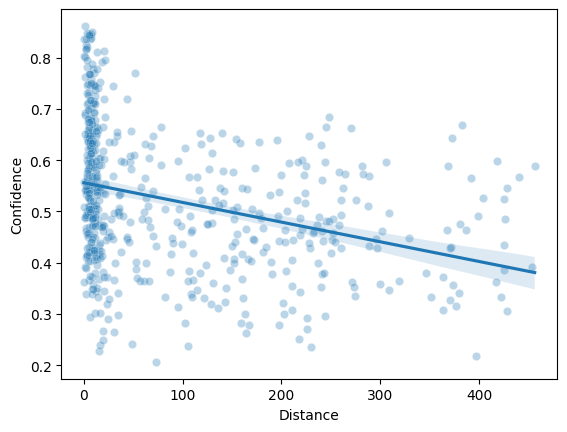

In [18]:
# load the confidences and check for each if it is correct or not to see correlation.

import json
from few_shot_keypoints.results import match_keypoints, calculate_confidence_correlation
from few_shot_keypoints.datasets.data_parsers import CocoKeypointsResultDataset
from few_shot_keypoints.datasets.coco_dataset import CocoKeypointsDataset


category = "bus"
coco_json = f"/home/tlips/Code/few-shot-keypoints/data/SPair-71k/SPAIR_coco_{category}_test.json"
coco_results_json = f"/home/tlips/Code/few-shot-keypoints/results/SPAIR-support-sets/dift/{category}/1/resize_2025_results.json"

with open(coco_results_json, "r") as f:
    coco_results_dataset = CocoKeypointsResultDataset(json.load(f))

with open(coco_json, "r") as f:
    coco_dataset = CocoKeypointsDataset(**json.load(f))

matched_predictions = match_keypoints(coco_dataset, coco_results_dataset)

distances, confidences = calculate_confidence_correlation(matched_predictions)

print(len(distances))
print(len(confidences))

import seaborn as sns

sns.scatterplot(x=distances, y=confidences, alpha=0.3)
sns.regplot(x=distances, y=confidences, scatter=False)
plt.xlabel("Distance")
plt.ylabel("Confidence")





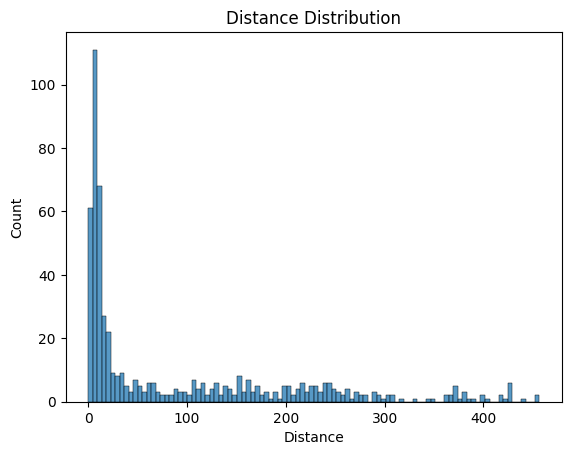

In [19]:
# create histogram of the distances and overlay the cumulative relative distribution  
import numpy as np  
sns.histplot(distances, bins=100)# cumulative=True, stat="density")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.title("Distance Distribution")
plt.show()


0.7913588709432163


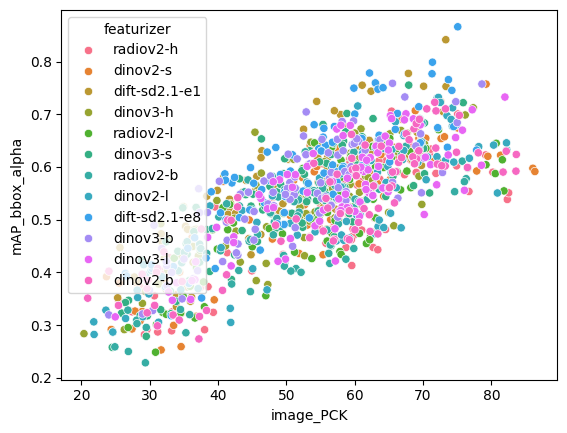

In [20]:
sns.scatterplot(x="image_PCK", y="mAP_bbox_alpha", hue="featurizer", data=df)
# correlation
print(df["image_PCK"].corr(df["mAP_bbox_alpha"]))